In [1]:
import pandas as pd
import statwrap 
%use_all
np.random.seed(1)

In [8]:
df = pd.read_csv('../Data/ATUS/ATUS_summary_sample.csv', index_col = 'Unnamed: 0')

In [9]:
df

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
17338,20031109031166,1,-1,35,1,1,58,1,2,-1,...,0,0,0,0,0,0,0,0,0,0
14849,20030908032425,1,-1,40,2,1,44,2,1,2,...,0,0,0,0,0,0,0,0,0,0
7817,20030504032022,1,-1,40,2,2,39,1,2,2,...,0,0,0,0,0,0,0,0,0,0
7,20030100014427,1,-1,40,2,1,21,1,2,2,...,0,0,0,0,0,0,0,0,0,0
658,20030112020809,1,-1,43,2,1,48,4,-1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231767,20220504221683,-1,1,43,2,1,47,1,2,2,...,0,0,0,0,0,0,0,0,0,0
229780,20220201222590,-1,1,40,2,1,63,5,-1,-1,...,0,0,7,0,0,0,0,0,0,0
235532,20221110220734,-1,1,39,2,1,71,5,-1,-1,...,0,0,0,0,0,0,0,0,0,0
230408,20220302222078,-1,2,46,2,1,85,5,-1,-1,...,0,0,0,0,0,0,0,43,0,0


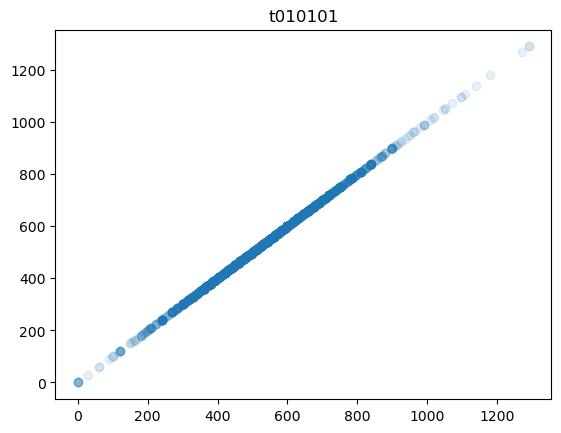

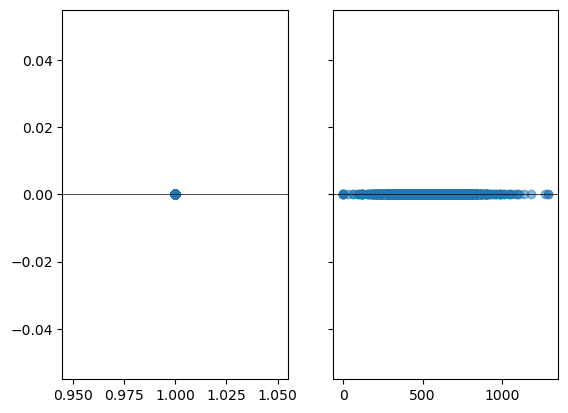

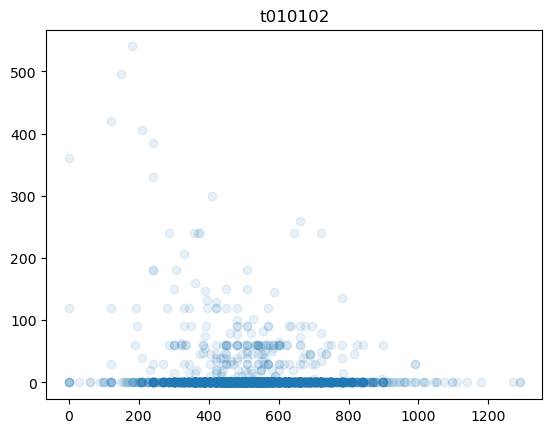

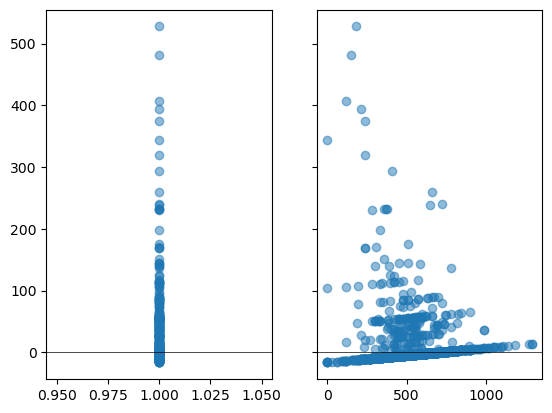

/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


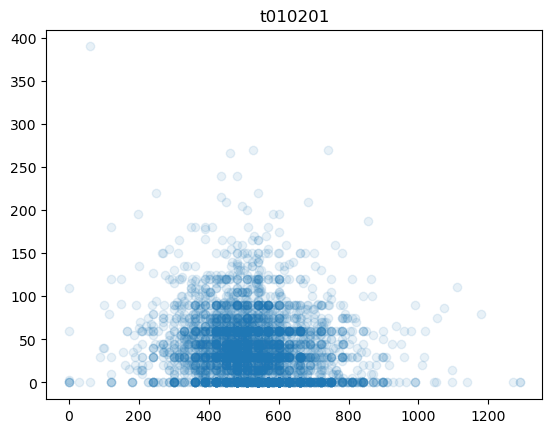

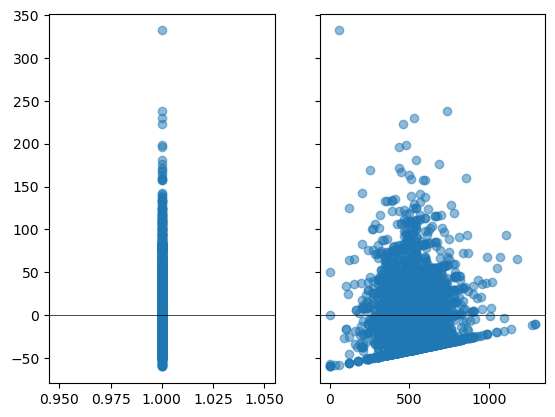

/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


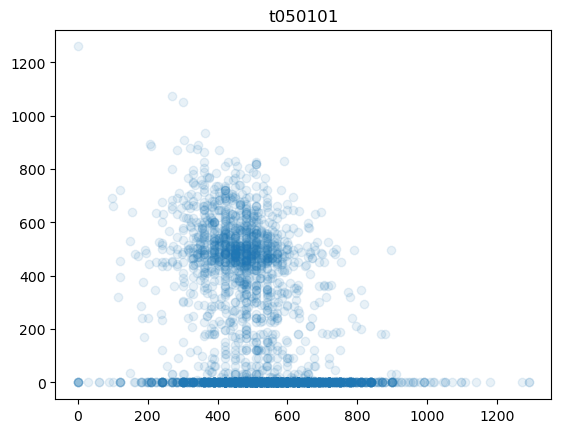

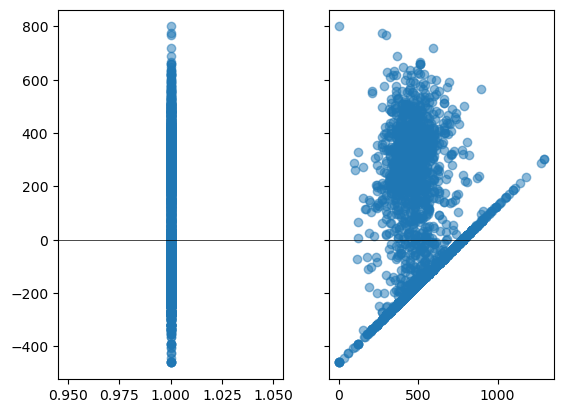

/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


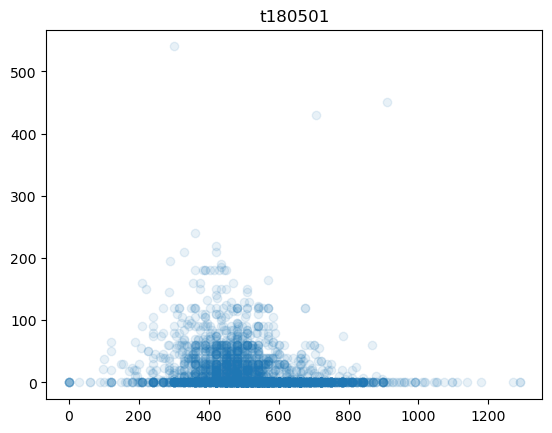

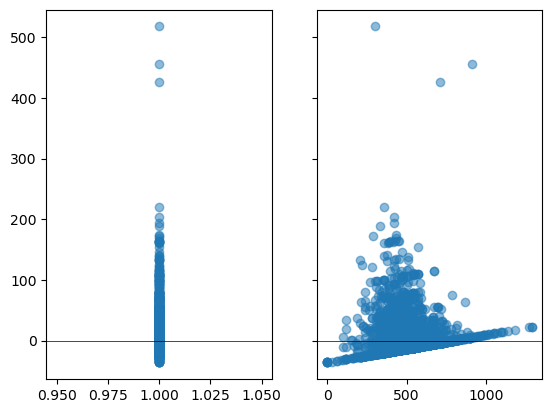

/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexanderclark/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [12]:
cols = [c for c in df.columns if c.startswith("t")]

for col in cols:
    x = df.t010101
    y = df[col]
    r = correl(x,y)
    if np.abs(r) > 0.1:
        plt.scatter(x, y, alpha = .1)
        plt.title(col)
        plt.show()
        
        reg = linest(y,x)
        reg.residual_plot()

In [14]:
df[['t010101','t010102']].to_clipboard()

In [15]:
reg = linest(df.t010102, df.t010101)

In [16]:
reg

In [22]:
reg.coefficients

array([16.57457009, -0.02334058])

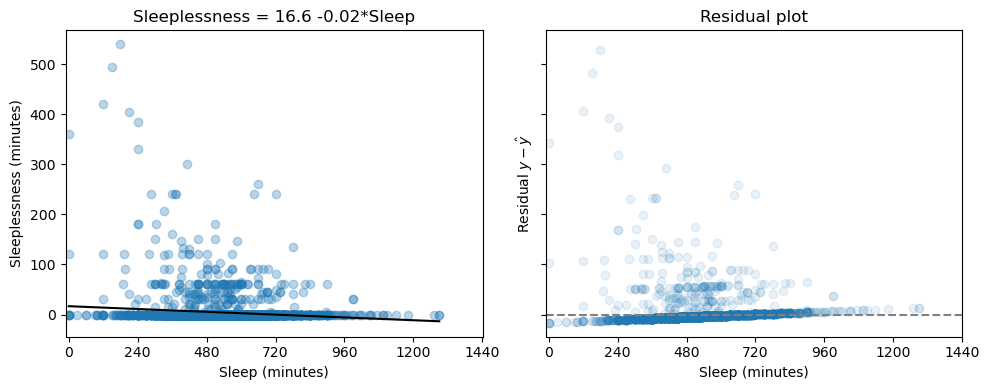

In [47]:
fig, axs = plt.subplots(1,2, figsize = (10,4), sharex = True, sharey= True)

b = reg.coefficients[0]
m = reg.coefficients[1]

ax = axs[0]
reg.plot(ax = axs[0], show = False)
axs[0].set_title(f"Sleeplessness = {b:.1f} {m:+.2f}*Sleep")
ax.set_xlabel("Sleep (minutes)")
ax.set_ylabel("Sleeplessness (minutes)")
ax.set_xlim(-10,1441)
ax.set_xticks(range(0,1441,240))

scatter_plot(df.t010101, reg.residuals, ax = axs[1],
            xlabel = 'Sleep (minutes)',
            ylabel = r'Residual $y-\hat{y}$',
            alpha = .1,
            title = 'Residual plot',
            show = False)
axs[1].axhline(0,ls = 'dashed', color = 'gray')

plt.tight_layout()
plt.savefig("../book/images/sleeplessnessResiduals.pdf")
plt.savefig("../book/images/sleeplessnessResiduals.svg", transparent = True)

plt.show()